In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
import PIL
print('Pillow Version:', PIL.__version__)

from PIL import Image

Pillow Version: 9.2.0


uint8
(499, 421, 3)


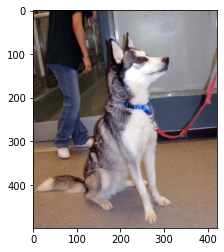

In [3]:
from matplotlib import image
from matplotlib import pyplot
data = image.imread(r'.\archive\test_set\test_set\dogs\dog.4001.jpg')
# summarize shape of the pixel array
print(data.dtype)
print(data.shape)
# display the array of pixels as an image
pyplot.imshow(data)
pyplot.show()

In [4]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import random
%matplotlib inline

(500, 300, 3)
(457, 500, 3)
(350, 245, 3)
(500, 387, 3)
(377, 221, 3)


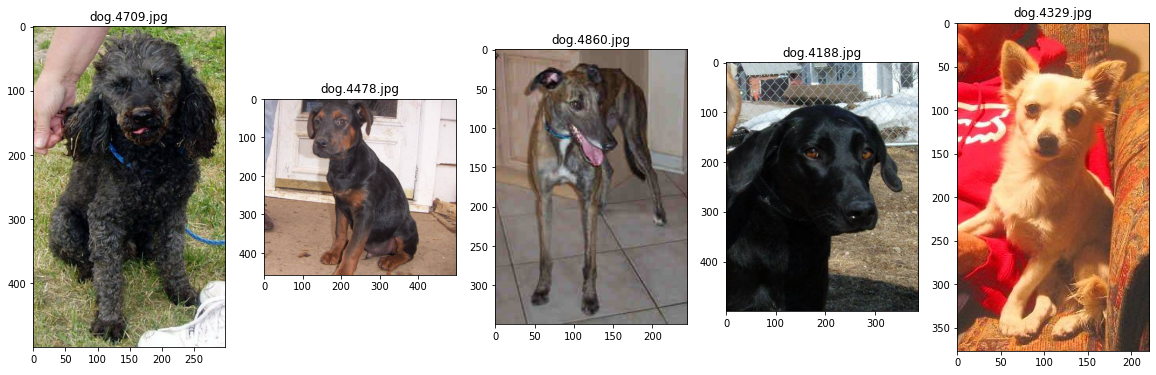

In [5]:
plt.figure(figsize=(20,20))
test_folder=r'.\archive\test_set\test_set\dogs'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    print(img.shape)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

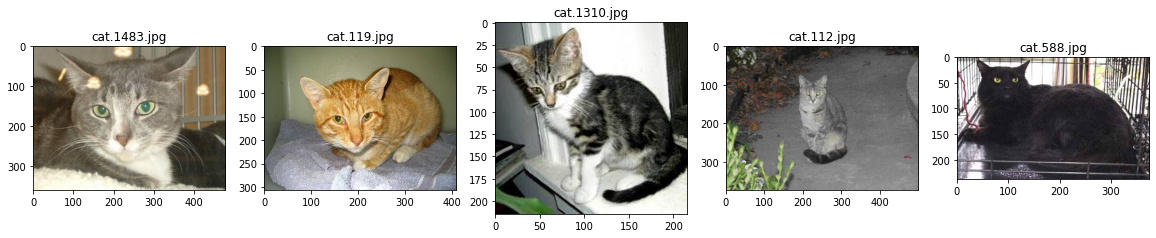

In [6]:
plt.figure(figsize=(20,20))
test_folder=r'.\archive\training_set\training_set\cats'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [7]:
IMG_WIDTH=200
IMG_HEIGHT=200
img_folder=r'.\archive\training_set\training_set'

def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
    
    for dir1 in os.listdir(img_folder):
        print("Collecting images for: ",dir1)
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            try:
                image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            except:
                break
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    
    print("Collected All data.")
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name =create_dataset(img_folder)


Collected All data.


In [8]:
img_data=np.array(img_data)
class_name=np.array(class_name)
img_data.shape

(2018, 200, 200, 3)

In [9]:
def dog_cat_mapping(a):
    if a=="dogs":
        return 1
    else:return 0
class_name=list(map(dog_cat_mapping,class_name))
class_name=np.array(class_name)


In [10]:
input_shape=img_data.shape[1:]
input_shape

(200, 200, 3)

In [15]:
from tensorflow.keras.applications import InceptionResNetV2
conv_base=InceptionResNetV2(weights='imagenet',include_top=False,input_shape=(200,200,3))

In [16]:
def model():
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
    model=Sequential()
    model.add(conv_base)
    model.add(Flatten())
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='sigmoid'))
    return model
#The Accuracy is: 0.898204

In [17]:
model=model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 4, 4, 1536)       54336736  
 onal)                                                           
                                                                 
 flatten_1 (Flatten)         (None, 24576)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               6291712   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 60,628,705
Trainable params: 60,568,161
Non-trainable params: 60,544
_____________________________________

In [18]:
conv_base.trainable=False
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])
model.fit(x=img_data,y=class_name, epochs=5)

Epoch 1/5
64/64 [==============================] - 178s 2s/step - loss: 1.2151 - accuracy: 0.9564
Epoch 2/5
64/64 [==============================] - 149s 2s/step - loss: 0.6486 - accuracy: 0.9822
Epoch 3/5
64/64 [==============================] - 167s 3s/step - loss: 0.2797 - accuracy: 0.9866
Epoch 4/5
64/64 [==============================] - 165s 3s/step - loss: 0.2084 - accuracy: 0.9896
Epoch 5/5
64/64 [==============================] - 146s 2s/step - loss: 0.0510 - accuracy: 0.9941


In [21]:
IMG_WIDTH=200
IMG_HEIGHT=200
img_folder=r'./archive/test_set/test_set'


# extract the image array and class name
img_data_test, class_name_test =create_dataset(r'./archive/test_set/test_set')

In [23]:
img_data_test=np.array(img_data_test)
class_name_test=list(map(dog_cat_mapping,class_name_test))
class_name_test=np.array(class_name_test)
preds=model.predict(img_data_test).round().astype(int)
flat_pred = [item for sublist in preds for item in sublist]
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(class_name_test, flat_pred)
print("The Accuracy is: %2f" % accuracy)

32/32 [==============================] - 71s 2s/step
The Accuracy is: 0.504941


In [24]:
incorrects = np.nonzero(model.predict(img_data_test).round().astype(int).reshape((-1,)) != class_name_test)

32/32 [==============================] - 71s 2s/step


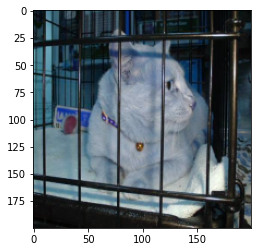

In [25]:
#incorrects- 7,71,84 etc.

plt.imshow(img_data_test[7])

In [26]:
from keras.models import load_model

model.save('catdog.h5')  # creates a HDF5 file 'my_model.h5'
from keras.models import save_model
#model = save_model(model,'/cat_dog.h5')
IMG_WIDTH=20
IMG_HEIGHT=200
#img_folder='C:\Users\saksh\Downloads\test_set\test_set'


In [27]:
model.save('./models_catdog', save_format='tf')

INFO:tensorflow:Assets written to: ./models_catdog\assets


INFO:tensorflow:Assets written to: ./models_catdog\assets


In [ ]:
!pip install pyngrok

In [ ]:
!pip install -q streamlit